In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import preprocessing
import random

In [165]:
train_df=pd.read_csv(r'C:\Users\ka422490\Downloads\Spring 20\CAP-5610-Machine Learning\Assignments\H,W 1\titanic\train.csv')
test_df=pd.read_csv(r'C:\Users\ka422490\Downloads\Spring 20\CAP-5610-Machine Learning\Assignments\H,W 1\titanic\test.csv')
combine=[train_df,test_df]
merged=pd.concat(combine)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [130]:
merged.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [131]:
df=train_df[train_df['Pclass']==1]

In [132]:
df.Survived.value_counts()

1    136
0     80
Name: Survived, dtype: int64

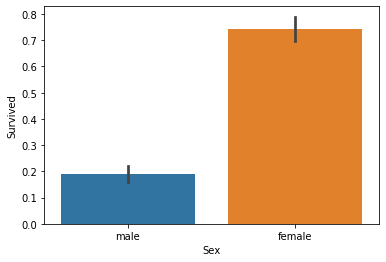

In [133]:
sns_plot=sns.barplot(data=merged,x='Sex',y='Survived')

In [134]:
df1=merged[merged['Survived']==1]

In [135]:
df1.Sex.value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [136]:
merged.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

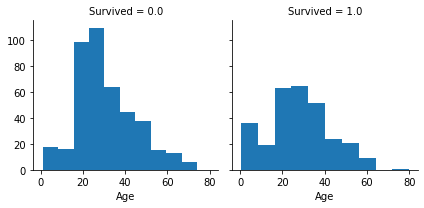

In [137]:
g=sns.FacetGrid(col='Survived',data=merged)
g.map(plt.hist,'Age')

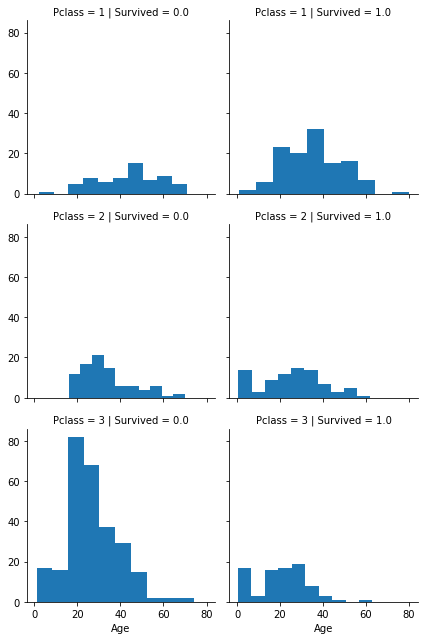

In [138]:
h=sns.FacetGrid(row='Pclass',col='Survived',data=merged)
h.map(plt.hist,'Age')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


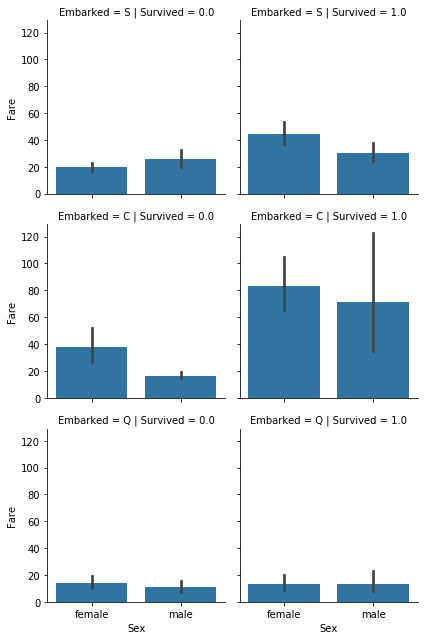

In [139]:
h=sns.FacetGrid(row='Embarked',col='Survived',data=merged)
h.map(sns.barplot,'Sex','Fare')

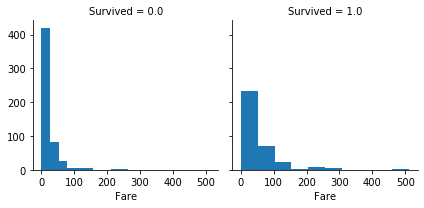

In [73]:
h=sns.FacetGrid(col='Survived',data=merged)
h.map(plt.hist,'Fare')

In [140]:
td1=df.Ticket.duplicated().sum()

In [141]:
tds=df.Ticket.count()

In [142]:
tda=((td1)/tds)*100

In [143]:
tda

31.944444444444443

In [144]:
merged.corr()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Age,1.000000,0.178740,-0.150917,0.028814,-0.408106,-0.243699,-0.077221
Fare,0.178740,1.000000,0.221539,0.031428,-0.558629,0.160238,0.257307
Parch,-0.150917,0.221539,1.000000,0.008942,0.018322,0.373587,0.081629
PassengerId,0.028814,0.031428,0.008942,1.000000,-0.038354,-0.055224,-0.005007
Pclass,-0.408106,-0.558629,0.018322,-0.038354,1.000000,0.060832,-0.338481
SibSp,-0.243699,0.160238,0.373587,-0.055224,0.060832,1.000000,-0.035322
Survived,-0.077221,0.257307,0.081629,-0.005007,-0.338481,-0.035322,1.000000


In [145]:
merged.Cabin.isnull().sum()

1014

In [146]:
merged=merged.rename(columns = {'Sex':'Gender'})

In [147]:
merged['Gender'].replace('female',1,inplace=True)

In [148]:
merged['Gender'].replace('male',0,inplace=True)

In [149]:
merged.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Gender,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,0.0,373450


In [150]:
mean_age=merged.Age.mean()

In [151]:
std_age=merged.Age.std()

In [166]:
X=merged.Age.fillna(lambda x: random.choice(mean_age<std_age), inplace =True)

In [160]:
merged.Embarked.value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [161]:
merged.Embarked.fillna('S',inplace=True)

In [162]:
merged.Embarked.count()

1309

In [163]:
merged

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Gender,SibSp,Survived,Ticket
0,22,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0.0,A/5 21171
1,38,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1.0,PC 17599
2,26,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,1.0,STON/O2. 3101282
3,35,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1.0,113803
4,35,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
413,<function <lambda> at 0x0000012446BDC1F8>,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,0,0,NaN,A.5. 3236
414,39,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,1,0,NaN,PC 17758
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,0,0,NaN,SOTON/O.Q. 3101262
416,<function <lambda> at 0x0000012446BDC1F8>,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,0,0,NaN,359309


In [90]:
test_df.Fare.mode()

0    7.75
dtype: float64

In [91]:
test_df.Fare.fillna(7.75)

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

In [92]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [93]:
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [101]:
bins = [-0.001, 9.71, 14.454, 31, 512.329]
names = ['-0.001-9.71', '9.71-14.454', '14.454-31', '31-512.329']

merged['FareBand'] = pd.cut(merged['Fare'], bins, labels=names)

In [95]:
merged.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Gender,SibSp,Survived,Ticket,FareBand
0,22,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0.0,A/5 21171,-0.001-9.71
1,38,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1.0,PC 17599,31-512.329
2,26,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,1.0,STON/O2. 3101282,-0.001-9.71
3,35,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1.0,113803,31-512.329
4,35,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,0.0,373450,-0.001-9.71


In [99]:
import numpy as np
from sklearn.impute import SimpleImputer

In [107]:
le = preprocessing.LabelEncoder()

In [108]:
merged.FareBand = le.fit_transform(merged.FareBand.astype(str))

In [109]:
merged.Fare_indicator = pd.cut(merged.FareBand,
                     bins=[-0.001, 9.71, 14.454, 31, 512.329],
                     labels=[0,1,2,3])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [110]:
merged.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Gender,SibSp,Survived,Ticket,FareBand
0,22,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0.0,A/5 21171,0
1,38,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1.0,PC 17599,2
2,26,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,1.0,STON/O2. 3101282,0
3,35,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1.0,113803,2
4,35,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,0.0,373450,0


In [111]:
merged=merged.rename(columns = {'FareBand':'Fare_indicator'})

In [112]:
merged.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Gender,SibSp,Survived,Ticket,Fare_indicator
0,22,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0.0,A/5 21171,0
1,38,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1.0,PC 17599,2
2,26,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,1.0,STON/O2. 3101282,0
3,35,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1.0,113803,2
4,35,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,0.0,373450,0


In [169]:
for data in combine:
    mu=np.mean(data['Age'])
    sigma=np.std(data['Age'])
    data.loc[data.Age.isnull(), "Age"] = random.gauss(mu, sigma)

In [170]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [171]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [174]:
merged=pd.concat(combine)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [175]:
merged.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
413,12.018271,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
414,39.000000,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
415,38.500000,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
416,12.018271,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
417,12.018271,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668
